In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import PIL.Image

import matplotlib.pyplot as plt

In [3]:
GROUND_PATH = os.path.join(os.getcwd(), 'data\\PH2_Dataset.csv')

IMAGES_PATH = os.path.join(os.getcwd(), 'data\\ph2-example-images\\')


def csv_to_array(path, type):
    return np.genfromtxt (path, delimiter=",", dtype=type, names=True)

def orderData(labels, data):
    ordered_labels = [x for _,x in sorted(zip(data, labels), reverse=True)]
    ordered_values = sorted(data, reverse=True)
    
    return ordered_labels, ordered_values

ph2_array = csv_to_array(GROUND_PATH, None)

print(ph2_array)

[(b'IMD003', b'', 0, 0, b'T', b'A', b'A', b'A', b'A',     4)
 (b'IMD009', b'', 0, 0, b'T', b'A', b'A', b'A', b'A',     3)
 (b'IMD016', b'', 0, 0, b'T', b'T', b'A', b'A', b'A',    34)
 (b'IMD022', b'', 0, 0, b'T', b'A', b'A', b'A', b'A',     3)
 (b'IMD024', b'', 0, 0, b'T', b'A', b'A', b'A', b'A',    34)
 (b'IMD025', b'', 0, 0, b'T', b'T', b'A', b'A', b'A',     3)
 (b'IMD035', b'', 0, 2, b'T', b'A', b'A', b'A', b'A',    23)
 (b'IMD038', b'', 0, 0, b'T', b'T', b'A', b'A', b'A',    46)
 (b'IMD042', b'', 0, 0, b'T', b'T', b'A', b'A', b'A',    34)
 (b'IMD044', b'', 0, 0, b'T', b'T', b'A', b'A', b'A',    45)
 (b'IMD045', b'', 0, 0, b'T', b'T', b'A', b'A', b'A',     3)
 (b'IMD050', b'', 0, 0, b'T', b'T', b'A', b'A', b'A',     3)
 (b'IMD092', b'', 0, 0, b'T', b'T', b'A', b'A', b'A',    34)
 (b'IMD101', b'', 0, 0, b'T', b'A', b'A', b'A', b'A',     3)
 (b'IMD103', b'', 0, 0, b'T', b'T', b'A', b'A', b'A',    34)
 (b'IMD112', b'', 0, 0, b'T', b'T', b'A', b'A', b'A',   234)
 (b'IMD118', b'', 0, 0, 

C:\Users\el295904\AppData\Local\Temp\ipykernel_9036\3550571148.py:7: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  return np.genfromtxt (path, delimiter=",", dtype=type, names=True)


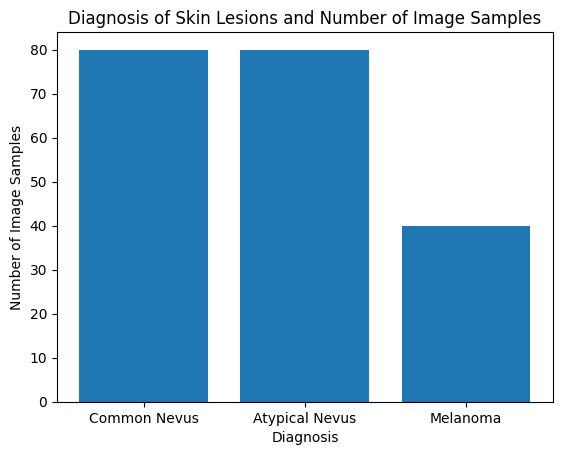

In [45]:
diagnosis = ph2_array['ClinicalDiagnosis']

diagnosis_list = [0, 1, 2]
diagnosis_labels = ['Common Nevus', 'Atypical Nevus', 'Melanoma']

diagnosis_values = [0, 0, 0]

for i in range(0, diagnosis.shape[0]):
    for j in range(0, len(diagnosis_list)):
        if diagnosis[i] == diagnosis_list[j]:
            diagnosis_values[j] += 1

ordered_labels, ordered_values = orderData(diagnosis_labels, diagnosis_values)

plt.ylabel("Number of Image Samples")
plt.xlabel("Diagnosis")
plt.title("Diagnosis of Skin Lesions and Number of Image Samples")

plt.bar(ordered_labels, ordered_values)

plt.show()

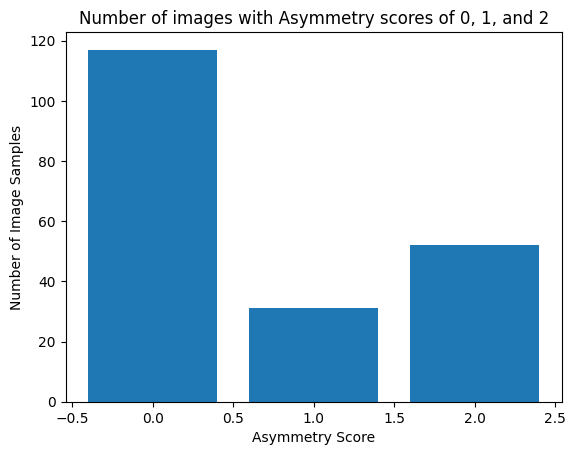

In [46]:
asymmetry = ph2_array['Asymmetry']

asymmetry_list = [0, 1, 2]

asymmetry_values = [0, 0, 0]

for i in range(0, asymmetry.shape[0]):
    for j in range(0, len(asymmetry_list)):
        if asymmetry[i] == asymmetry_list[j]:
            asymmetry_values[j] += 1

#ordered_labels, ordered_values = orderData(asymmetry_list, asymmetry_values)

plt.ylabel("Number of Image Samples")
plt.xlabel("Asymmetry Score")
plt.title("Number of images with Asymmetry scores of 0, 1, and 2")

plt.bar(asymmetry_list, asymmetry_values)

plt.show()

C:\Users\el295904\AppData\Local\Temp\ipykernel_9752\3614778715.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[s].set_xticklabels(structure_labels, rotation=90)


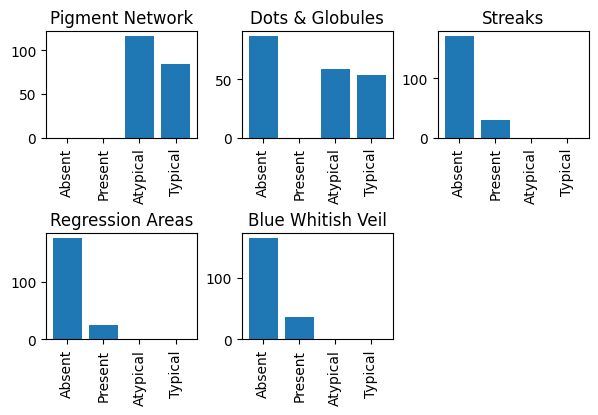

In [47]:
structures_labels = ['PigmentNetwork', 'DotsGlobules', 'Streaks', 'RegressionAreas', 'BlueWhitishVeil']

structures_names = ['Pigment Network', 'Dots & Globules', 'Streaks', 'Regression Areas', 'Blue Whitish Veil']

structure_list = [b'A', b'P', b'AT', b'T']
structure_labels = ['Absent','Present', 'Atypical', 'Typical']

fig, ax = plt.subplots(2, 3, figsize = (7, 4))
fig.subplots_adjust(hspace = 0.9, wspace = 0.3)

ax = ax.ravel()

fig.delaxes(ax[5])

for s in range(0, len(structures_labels)):
    structure = ph2_array[structures_labels[s]]

    structure_values = [0, 0, 0, 0]

    for i in range(0, structure.shape[0]):
        for j in range(0, len(structure_list)):
            if structure[i] == structure_list[j]:
                structure_values[j] += 1

    #ordered_labels, ordered_values = orderData(structure_labels, structure_values)
    ax[s].set_title(structures_names[s])
    ax[s].bar(structure_labels, structure_values)    
    ax[s].set_xticklabels(structure_labels, rotation=90)

plt.show()

C:\Users\el295904\AppData\Local\Temp\ipykernel_9752\1876609481.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[d].set_xticklabels(structure_labels, rotation=90)


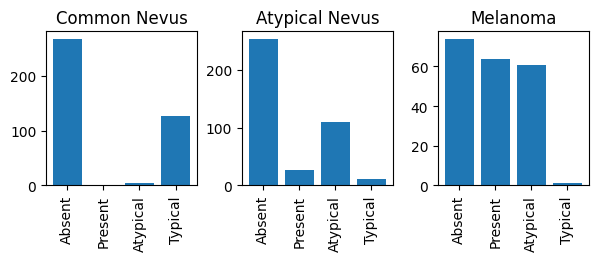

In [48]:
structures_labels = ['PigmentNetwork', 'DotsGlobules', 'Streaks', 'RegressionAreas', 'BlueWhitishVeil']

structures_names = ['Pigment Network', 'Dots & Globules', 'Streaks', 'Regression Areas', 'Blue Whitish Veil']

structure_list = [b'A', b'P', b'AT', b'T']
structure_labels = ['Absent','Present', 'Atypical', 'Typical']

diagnosis = ph2_array['ClinicalDiagnosis']

diagnosis_list = [0, 1, 2]
diagnosis_labels = ['Common Nevus', 'Atypical Nevus', 'Melanoma']

fig, ax = plt.subplots(1, 3, figsize = (7, 2))
fig.subplots_adjust(hspace = 0.7, wspace = 0.3)

ax = ax.ravel()

#fig.delaxes(ax[3])

for d in range(0, 3):
    values = [0, 0, 0, 0]
    for s in range(0, len(structures_labels)):
        for i in range(0, ph2_array[structures_labels[s]].shape[0]):
            for t in range(0, len(structure_list)):
                 
                if diagnosis[i] == d and ph2_array[structures_labels[s]][i] == structure_list[t]:
                    values[t] += 1

    #ordered_labels, ordered_values = orderData(colors_labels, colors_values)
    ax[d].set_title(diagnosis_labels[d])
    ax[d].bar(structure_labels, values)
    ax[d].set_xticklabels(structure_labels, rotation=90)

plt.show()

C:\Users\el295904\AppData\Local\Temp\ipykernel_9752\902570102.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[d].set_xticklabels(structures_names, rotation=90)


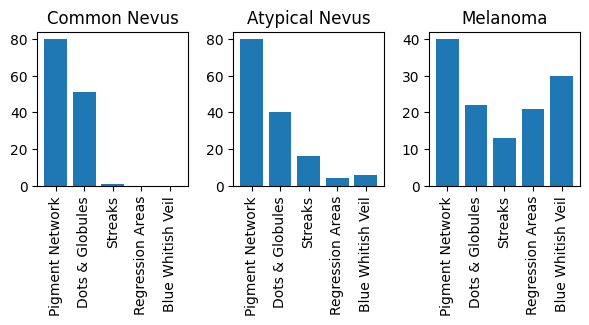

In [49]:
structures_labels = ['PigmentNetwork', 'DotsGlobules', 'Streaks', 'RegressionAreas', 'BlueWhitishVeil']

structures_names = ['Pigment Network', 'Dots & Globules', 'Streaks', 'Regression Areas', 'Blue Whitish Veil']

structure_list = [b'A', b'P', b'AT', b'T']
structure_labels = ['Absent','Present', 'Atypical', 'Typical']

diagnosis = ph2_array['ClinicalDiagnosis']

diagnosis_list = [0, 1, 2]
diagnosis_labels = ['Common Nevus', 'Atypical Nevus', 'Melanoma']

fig, ax = plt.subplots(1, 3, figsize = (7, 2))
fig.subplots_adjust(hspace = 0.7, wspace = 0.3)

ax = ax.ravel()

#fig.delaxes(ax[3])

for d in range(0, 3):
    values = [0, 0, 0, 0, 0]
    for s in range(0, len(structures_labels)):
        for i in range(0, ph2_array[structures_labels[s]].shape[0]):
                if diagnosis[i] == d and ph2_array[structures_labels[s]][i] != structure_list[0]:
                    values[s] += 1

    #ordered_labels, ordered_values = orderData(colors_labels, colors_values)
    ax[d].set_title(diagnosis_labels[d])
    ax[d].bar(structures_names, values)
    ax[d].set_xticklabels(structures_names, rotation=90)

plt.show()

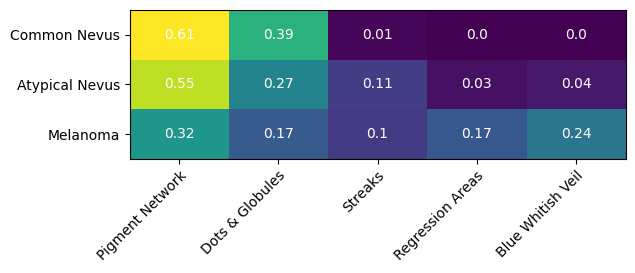

In [21]:
structures_labels = ['PigmentNetwork', 'DotsGlobules', 'Streaks', 'RegressionAreas', 'BlueWhitishVeil']

structures_names = ['Pigment Network', 'Dots & Globules', 'Streaks', 'Regression Areas', 'Blue Whitish Veil']

structure_list = [b'A', b'P', b'AT', b'T']
structure_labels = ['Absent','Present', 'Atypical', 'Typical']

diagnosis = ph2_array['ClinicalDiagnosis']

diagnosis_list = [0, 1, 2]
diagnosis_labels = ['Common Nevus', 'Atypical Nevus', 'Melanoma']

grid = [[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]

#fig.delaxes(ax[3])

for d in range(0, 3):
    for s in range(0, len(structures_labels)):
        for i in range(0, ph2_array[structures_labels[s]].shape[0]):
            if diagnosis[i] == d and ph2_array[structures_labels[s]][i] != structure_list[0]:
                grid[d][s] += 1



for i in range(0, len(grid)):
    v = 0

    for j in range(0, len(grid[i])):
        v += grid[i][j] 
    
    for j in range(0, len(grid[i])):
        grid[i][j] /= v

fig, ax = plt.subplots()
im = ax.imshow(grid)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(diagnosis_labels)):
    for j in range(len(structures_labels)):
        text = ax.text(j, i, round(grid[i][j], 2),
                       ha="center", va="center", color="w")


ax.set_aspect(aspect=0.5)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(structures_names)), labels=structures_names)
ax.set_yticks(np.arange(len(diagnosis_labels)), labels=diagnosis_labels)

plt.show()

C:\Users\el295904\AppData\Local\Temp\ipykernel_9752\568416723.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[d].set_xticklabels(structure_labels, rotation=90)


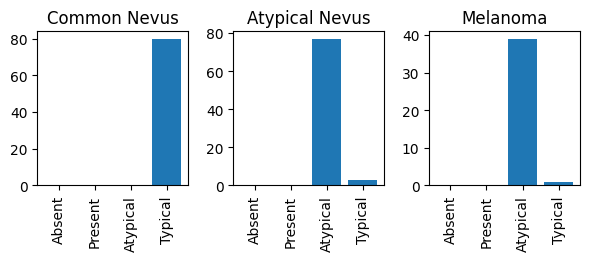

In [54]:
structures_labels = ['PigmentNetwork', 'DotsGlobules', 'Streaks', 'RegressionAreas', 'BlueWhitishVeil']

structures_names = ['Pigment Network', 'Dots & Globules', 'Streaks', 'Regression Areas', 'Blue Whitish Veil']

structure_list = [b'A', b'P', b'AT', b'T']
structure_labels = ['Absent','Present', 'Atypical', 'Typical']

diagnosis = ph2_array['ClinicalDiagnosis']

diagnosis_list = [0, 1, 2]
diagnosis_labels = ['Common Nevus', 'Atypical Nevus', 'Melanoma']

fig, ax = plt.subplots(1, 3, figsize = (7, 2))
fig.subplots_adjust(hspace = 0.7, wspace = 0.3)

ax = ax.ravel()

#fig.delaxes(ax[3])

for d in range(0, 3):
    values = [0, 0, 0, 0]
    for s in range(0, len(structure_list)):
        for i in range(0, ph2_array['PigmentNetwork'].shape[0]):
            if diagnosis[i] == d and ph2_array['PigmentNetwork'][i] == structure_list[s]:
                values[s] += 1

    #ordered_labels, ordered_values = orderData(colors_labels, colors_values)
    ax[d].set_title(diagnosis_labels[d])
    ax[d].bar(structure_labels, values)
    ax[d].set_xticklabels(structure_labels, rotation=90)

plt.show()

C:\Users\el295904\AppData\Local\Temp\ipykernel_8836\1261563361.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[s].set_xticklabels(colors_labels, rotation=90)


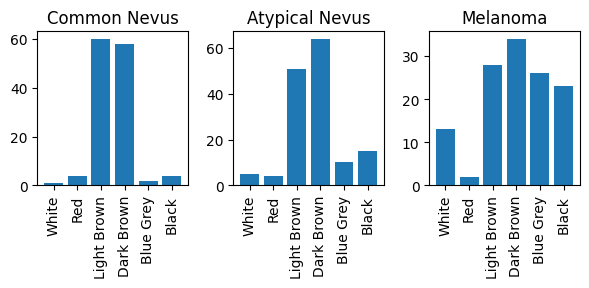

In [8]:
colors = ph2_array['Colors']

colors_list = ['1', '2', '3', '4', '5', '6']

colors_labels = ['White', 'Red', 'Light Brown', 'Dark Brown', 'Blue Grey', 'Black']

diagnosis = ph2_array['ClinicalDiagnosis']

diagnosis_list = [0, 1, 2]
diagnosis_labels = ['Common Nevus', 'Atypical Nevus', 'Melanoma']

fig, ax = plt.subplots(1, 3, figsize = (7, 2))
fig.subplots_adjust(hspace = 0.7, wspace = 0.3)

ax = ax.ravel()

#fig.delaxes(ax[3])

for s in range(0, 3):
    values = [0, 0, 0, 0, 0, 0]
    
    for i in range(0, colors.shape[0]):
        if(diagnosis[i] == s):
            list = [int(x) for x in str(colors[i])] #Convert numbers into string
            for l in range(0, len(list)):
                values[list[l]-1] += 1

    #ordered_labels, ordered_values = orderData(colors_labels, colors_values)
    ax[s].set_title(diagnosis_labels[s])
    ax[s].bar(colors_labels, values)
    ax[s].set_xticklabels(colors_labels, rotation=90)

plt.show()

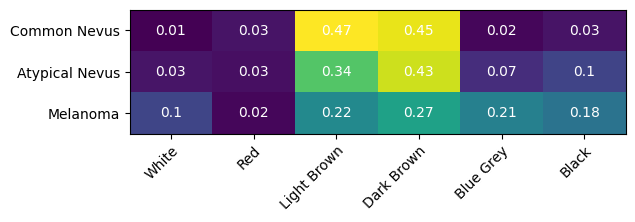

In [20]:
colors = ph2_array['Colors']

colors_list = ['1', '2', '3', '4', '5', '6']

colors_labels = ['White', 'Red', 'Light Brown', 'Dark Brown', 'Blue Grey', 'Black']

diagnosis = ph2_array['ClinicalDiagnosis']

diagnosis_list = [0, 1, 2]
diagnosis_labels = ['Common Nevus', 'Atypical Nevus', 'Melanoma']

grid = [[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]

#fig.delaxes(ax[3])

for s in range(0, 3):
    
    for i in range(0, colors.shape[0]):
        if(diagnosis[i] == s):
            list = [int(x) for x in str(colors[i])] 
            
            #Convert numbers into string
            for l in range(0, len(list)):
                grid[s][list[l]-1] += 1


for i in range(0, len(grid)):
    v = 0

    for j in range(0, len(grid[i])):
        v += grid[i][j] 
    
    for j in range(0, len(grid[i])):
        grid[i][j] /= v

fig, ax = plt.subplots()
im = ax.imshow(grid)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(diagnosis_labels)):
    for j in range(len(colors_labels)):
        text = ax.text(j, i, round(grid[i][j], 2),
                       ha="center", va="center", color="w")


ax.set_aspect(aspect=0.5)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(colors_labels)), labels=colors_labels)
ax.set_yticks(np.arange(len(diagnosis_labels)), labels=diagnosis_labels)

plt.show()

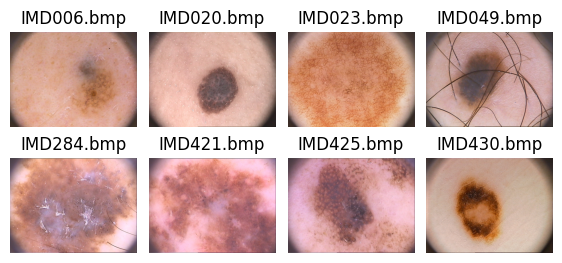

In [43]:
images = os.listdir(IMAGES_PATH)
img_arr = []

def load_image(img):
    img = PIL.Image.open(IMAGES_PATH+img).convert('RGB')
    return img

for image in images:
    img_arr.append(load_image(image))

fig, axarr = plt.subplots(2,4, figsize = (7, 3))

fig.subplots_adjust(hspace = 0.2, wspace = 0.1)

ax = axarr.ravel()

for i in range(0, len(img_arr)):
    ax[i].axis('off')
    ax[i].imshow(img_arr[i])
    ax[i].set_title(images[i])


Text(0.5, 1.0, 'Cropped')

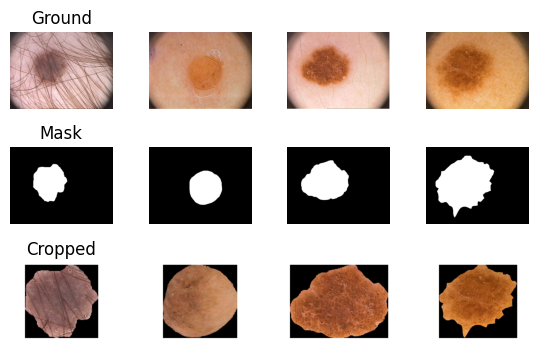

In [9]:
MASK_PATH = os.path.join(os.getcwd(), 'data\\PH2-cropped\\mask\\')
GROUND_PATH = os.path.join(os.getcwd(), 'data\\PH2-cropped\\ground\\')
CROPPED_PATH = os.path.join(os.getcwd(), 'data\\PH2-cropped\\cropped\\')

img_mask = os.listdir(MASK_PATH)
img_ground = os.listdir(GROUND_PATH)
img_cropped = os.listdir(CROPPED_PATH)

img_arr = []

def load_image(img, path):
    img = PIL.Image.open(path+img).convert('RGB')
    return img

def image_names(list, path):
    for image in list:
        img_arr.append(load_image(image, path))

image_names(img_ground, GROUND_PATH)
image_names(img_mask, MASK_PATH)
image_names(img_cropped, CROPPED_PATH)

fig, axarr = plt.subplots(3,4, figsize = (7, 4))

fig.subplots_adjust(hspace = 0.5, wspace = 0.1)

ax = axarr.ravel()

for i in range(0, len(img_arr)):
    ax[i].axis('off')
    ax[i].imshow(img_arr[i])
    #ax[i].set_title(i+1)

ax[0].set_title('Ground')
ax[4].set_title('Mask')
ax[8].set_title('Cropped')